# Clasificador de piezas de arte

- Curso: INFO257 Inteligencia Artificial
- Profesor: Pablo Huijse 
- Consultas por slack o correo: phuijse at inf dot uach dot cl 

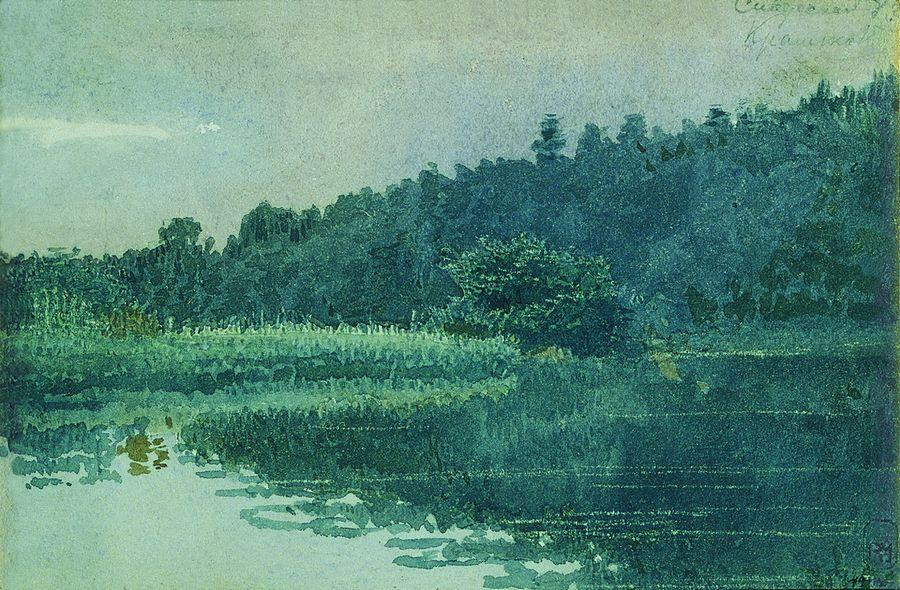

["Siverskaya" del pintor Ivan Kramskoy,1982](https://www.wikiart.org/en/ivan-kramskoy/siverskaya-1883)

## Objetivo

> El objetivo de esta actividad es entrenar y evaluar una red neuronal profunda para clasificar automáticamente el estilo de una pintura. Usted entrenará este modelo usando un conjunto de 1,000 imágenes de 10 estilos distintos. Las imágenes fueron obtenidas de la enciclopedia de arte visual [WikiArt.org](https://www.wikiart.org/)



## Datos

Para resolver esta tarea se le ha proporcionado una base de datos que puede descargar en el siguiente enlace: 

> https://drive.google.com/file/d/14JO2UMUnNYCyDGr_8qHVA_s4zn0d33pT/view?usp=sharing

La base de datos ya está separada en conjuntos de entrenamiento y prueba según los archivos de texto plano incluidos `train.txt` y `test.txt`, respectivamente. Se recomienda crear un script de Python que lea estos archivos y organice las imágenes tal que sean compatibles con [`torchvision.datasets.ImageFolder`](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder)

Las etiquetas se entregan como un entero de 0 a 9 cuyo significado es

- 0: [Art Nouveau o Modernismo](https://es.wikipedia.org/wiki/Modernismo_(arte))
- 1: [Barroco](https://es.wikipedia.org/wiki/Barroco)
- 2: [Expresionismo](https://es.wikipedia.org/wiki/Expresionismo)
- 3: [Impresionismo](https://es.wikipedia.org/wiki/Impresionismo)
- 4: [Neoclasicismo](https://es.wikipedia.org/wiki/Neoclasicismo)
- 5: [Posimpresionismoo](https://es.wikipedia.org/wiki/Posimpresionismo)
- 6: [Realismo](https://es.wikipedia.org/wiki/Realismo_art%C3%ADstico)
- 7: [Romanticismo](https://es.wikipedia.org/wiki/Romanticismo)
- 8: [Surrealismo](https://es.wikipedia.org/wiki/Surrealismo)
- 9: [Symbolism](https://es.wikipedia.org/wiki/Simbolismo)

## Instrucciones generales

- Se trabajará en grupos de dos personas. Informe los integrantes del grupo a su profesor a la brevedad
- El grupo debe crear un repositorio privado en www.github.com 
- Invite a su profesor como colaborador (usuario: phuijse)
- No suba los datos al repositorio, suba sólo sus códigos fuente y reportes de resultado
- Se evaluará en base al último *commit* del Lunes 11 de Enero de 2021
- [Sean honestos](https://www.acm.org/about-acm/code-of-ethics-in-spanish)


## Instrucciones específicas

En esta tarea usted debe seleccionar, entrenar y evaluar un modelo profundo para resolver el problema anteriormente presentado

1. Seleccione un modelo del módulo [`torchvision.models`](https://pytorch.org/docs/stable/torchvision/models.html) y descríbalo en detalle. Se recomienda revisar las publicaciones asociadas
1. Use el modelo  seleccionado pre-entrenado en ImageNet como extractor de características
1. Utilice un esquema de tipo *transfer learning* para entrenar el modelo. Usted debe diseñar una nueva cabeza clasificadora para el modelo seleccionado y decidir cuales/cuantas capas congelar. 

Indicaciones
- Separe el conjunto de entrenamiento en dos subconjuntos para ajustar los parámetros y calibrar los hiperparámetros, respectivamente. Proponga e implemente estrategias para prevenir el sobreajuste del modelo
- Evalue la capacidad de generalización de su modelo final midiendo su rendimiento en el conjunto de prueba. Presente sus resultados usando curvas de aprendizaje, matrices de confusión, *accuraccy* y *f1-score*. 
- Documente el proceso iterativo que lo llevó a decidir su arquitectura final. Justifique sus decisiones de función de costo, optimizador, arquitectura, regularización, etc. Analice sus resultados, inspeccione los errores del modelo. Comente, discuta y concluya

## Desarrollo

**Integrantes**:
- Reinaldo Bustamante
- María Belén Barrientos

### Modelo

Para elegir el modelo a implementar, analizamos el siguiente gráfico que nos muestra los distintos modelos en función de la precisión y la velocidad, y el tamaño de la burbuja cons indica el tamaño del modelo.


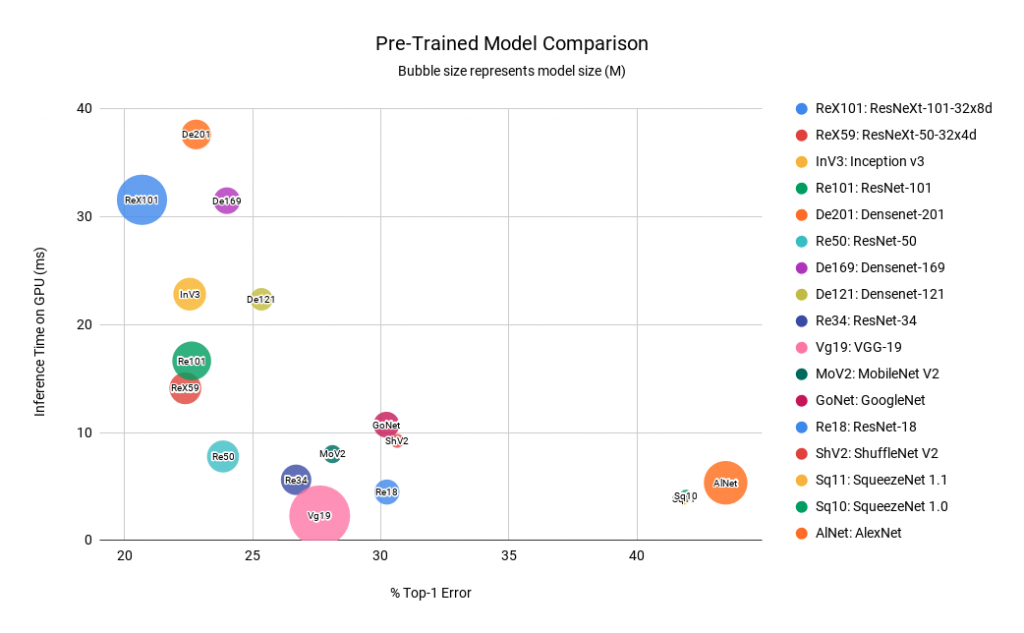

(Fuente: https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/)

Con esto, decidimos elegir nuestro modelo entre ResNet50, ResNet34, ResNet18 y MobileNet V2, resultando ser ResNet18, después de múltiples pruebas este modelo tuvo el mejor resultado al evaluar el conjunto de test.

#### Descripción Modelo Final

Luego del proceso iterativo que podemos apreciar más adelante, el modelo finalmente elegido fue el ResNet18.

ResNet fue el modelo ganador del ImageNet Challenge en 2015. Se ha convertido en una red neuronal clásica usada como columna vertebral en muchas tareas de visión artificial.

ResNet introdujo el concepto de **shortcut connections**, donde la idea es saltarse una o más capas como se muestra en la figura

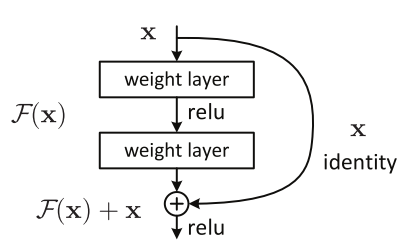

Los shortcut connections ayudan a mitigar el problema del desvanecimiento del gradiente y permite al modelo aprender una función de identidad que asegura que la capa más profunda se desempeñará al menos tan bien como la de menor profundidad, y no peor.

Las redes residuales más que esperar que las capas apiladas aprendan a aproximar $H(x)$, se deja que las capas aproximen una función residual $F(x) = H(x)-x$. El valor residual debe ser aprendido de una forma tal que se aproxime a $0$ y así, optimizar el mapeo de identidad.

La arquitectura del modelo la podemos apreciar a continuación:

In [48]:
display(models.resnet18(pretrained=True))

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Preparación de Datos

In [32]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [33]:
import os
import shutil

def organizeImages(file, source, destination):
    with open(file) as f:
        for line in f.readlines():
            x = line.rstrip().split(' ')
            title = x[0].split('/')[1]
            try:
                shutil.move(source + x[0], destination + x[1] + '/' + title)
            except OSError:
                os.makedirs(destination + x[1])
                shutil.move(source + x[0], destination + x[1] + '/' + title)
        print('Las imagenes se organizaron correctamente')

In [34]:
organizeImages('wikiart/train.txt', 'wikiart/', 'wikiart/images/input/')
organizeImages('wikiart/test.txt', 'wikiart/', 'wikiart/images/test/')

Las imagenes se organizaron correctamente
Las imagenes se organizaron correctamente


A continuación separamos el dataset de entrenamiento en train y validation

In [35]:
import splitfolders

splitfolders.ratio("wikiart/images/input", output="wikiart/images/", seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 810 files [00:03, 251.40 files/s]


Se establecen las transformaciones necesarias para que el dataset pueda ser analizado por el modelo preentreanado, también se usa aumentación de datos para el conjunto de entrenamiento

<IPython.core.display.Javascript object>


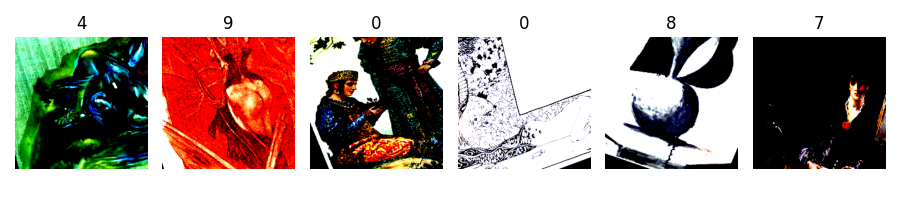

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [36]:
from torchvision import datasets
from torchvision import transforms
import torch

train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

train_dataset = datasets.ImageFolder('wikiart/images/train', transform=train_transforms)
valid_dataset = datasets.ImageFolder('wikiart/images/val', transform=valid_transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=256, shuffle=False)

for image, label in train_loader:
    break
    
fig, ax = plt.subplots(1, 6, figsize=(9, 2), tight_layout=True)
for i in range(6):
    ax[i].imshow(image[i].permute(1,2,0).numpy())
    ax[i].axis('off')
    ax[i].set_title(label[i].numpy())

### Implementación Modelo

Considerando el tamaño del dataset (pequeño) y de que este no tiene demasiado parecido a los dataset de ImageNet con los que fueron entrenados los modelos, es necesario cambiar más capas aparte de la última para que el modelo se adapte de buena forma a nuestro problema.

#### Proceso Iterativo

##### ResNet18

###### Modelo #1

In [43]:
from torchvision import models

model = models.resnet18(pretrained=True, progress=True)
display(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [44]:
count = 0
for child in model.children():
    count+=1
print(count)

10


In [45]:
#Se congelan n capas
count = 0
for child in model.children():
  count+=1
  if count < 8: #Cambiar n por la cantidad de capas a congelar +1
    for param in child.parameters():
        param.requires_grad = False

In [46]:
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Loss, Accuracy
from ignite.handlers import ModelCheckpoint, EarlyStopping
from ignite.engine import Engine

# Recuperamos el número de neuronas de la última capa
neurons = model.fc.in_features 
# La reemplazamos por una nueva capa de salida
model.fc = torch.nn.Linear(neurons, 10) 

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
max_epochs = 100

device = torch.device('cpu')
#device = torch.device('cuda')

model = model.to(device)

# Esto es lo que hace el engine de entrenamiento
def train_one_step(engine, batch):
    optimizer.zero_grad()
    x, y = batch
    x, y = x.to(device), y.to(device)
    yhat = model.forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    return loss.item() # Este output puede llamar luego como trainer.state.output

# Esto es lo que hace el engine de evaluación
def evaluate_one_step(engine, batch):
    with torch.no_grad():
        x, y = batch
        x, y = x.to(device), y.to(device)
        yhat = model.forward(x)
        #loss = criterion(yhat, y)
        return yhat, y

trainer = Engine(train_one_step)
evaluator = Engine(evaluate_one_step)
early_stopping = EarlyStopping(patience=10, score_function=lambda engine: -engine.state.metrics['Loss'], trainer=trainer, cumulative_delta=True)
metrics = {'Loss': Loss(criterion), 'Acc': Accuracy()}
for name, metric in metrics.items():
    metric.attach(evaluator, name)

In [47]:
import time
from torch.utils.tensorboard import SummaryWriter
from ignite.handlers import ModelCheckpoint

# Contexto de escritura de datos para tensorboard
with SummaryWriter(log_dir=f'/tmp/tensorboard/run{time.time_ns()}') as writer:

    @trainer.on(Events.EPOCH_COMPLETED(every=1)) # Cada 1 epocas
    def log_results(engine):
        # Evaluo el conjunto de entrenamiento
        evaluator.run(train_loader) 
        writer.add_scalar("train/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("train/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
        # Evaluo el conjunto de validación
        evaluator.run(valid_loader) 
        writer.add_scalar("valid/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("valid/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
    # Guardo el mejor modelo en validación
    best_model_handler = ModelCheckpoint(dirname='.', require_empty=False, filename_prefix="best", n_saved=1,
                                         score_function=lambda engine: -engine.state.metrics['Loss'],
                                         score_name="val_loss")

    # Lo siguiente se ejecuta cada ves que termine el loop de validación
    evaluator.add_event_handler(Events.COMPLETED,
                                best_model_handler, {'resnet18': model})
    evaluator.add_event_handler(Events.COMPLETED, early_stopping)

    trainer.run(train_loader, max_epochs=max_epochs)

In [108]:
model.load_state_dict(torch.load('best_resnet18_val_loss=-0.3510.pt'))

<All keys matched successfully>

<IPython.core.display.Javascript object>


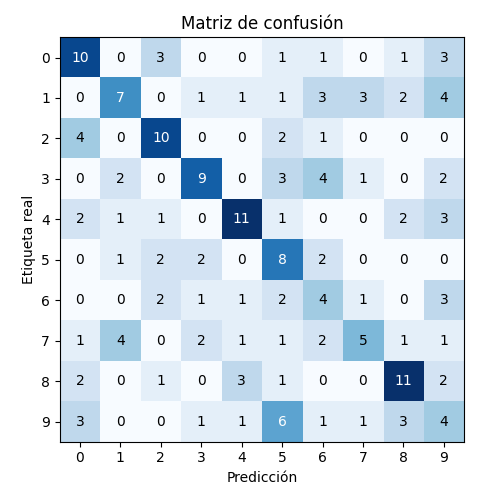

              precision    recall  f1-score   support

           0      0.455     0.526     0.488        19
           1      0.467     0.318     0.378        22
           2      0.526     0.588     0.556        17
           3      0.562     0.429     0.486        21
           4      0.611     0.524     0.564        21
           5      0.308     0.533     0.390        15
           6      0.222     0.286     0.250        14
           7      0.455     0.278     0.345        18
           8      0.550     0.550     0.550        20
           9      0.182     0.200     0.190        20

    accuracy                          0.422       187
   macro avg      0.434     0.423     0.420       187
weighted avg      0.444     0.422     0.425       187



In [50]:
test_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_dataset = datasets.ImageFolder('wikiart/images/test', transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=512)

targets, predictions = [], []
for mbdata, label in test_loader:
    logits = model.forward(mbdata)
    predictions.append(logits.argmax(dim=1).detach().numpy())
    targets.append(label.numpy())
predictions = np.concatenate(predictions)
targets = np.concatenate(targets)

from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')

cm = confusion_matrix(y_true=targets, y_pred=predictions)
plot_confusion_matrix(cm, labels=[str(i) for i in range(10)])

print(classification_report(targets, predictions, digits=3))

###### Modelo #2

In [51]:
from torchvision import models

model2 = models.resnet18(pretrained=True, progress=True)

In [52]:
#Se congelan n capas
count = 0
for child in model2.children():
  count+=1
  if count < 7: #Cambiar n por la cantidad de capas a congelar +1
    for param in child.parameters():
        param.requires_grad = False

In [53]:
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Loss, Accuracy
from ignite.handlers import ModelCheckpoint, EarlyStopping
from ignite.engine import Engine

# Recuperamos el número de neuronas de la última capa
neurons = model2.fc.in_features 
# La reemplazamos por una nueva capa de salida
model2.fc = torch.nn.Linear(neurons, 10) 

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3)
max_epochs = 100

device = torch.device('cpu')
#device = torch.device('cuda')

model2 = model2.to(device)

# Esto es lo que hace el engine de entrenamiento
def train_one_step(engine, batch):
    optimizer.zero_grad()
    x, y = batch
    x, y = x.to(device), y.to(device)
    yhat = model2.forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    return loss.item() # Este output puede llamar luego como trainer.state.output

# Esto es lo que hace el engine de evaluación
def evaluate_one_step(engine, batch):
    with torch.no_grad():
        x, y = batch
        x, y = x.to(device), y.to(device)
        yhat = model2.forward(x)
        #loss = criterion(yhat, y)
        return yhat, y

trainer = Engine(train_one_step)
evaluator = Engine(evaluate_one_step)
early_stopping = EarlyStopping(patience=10, score_function=lambda engine: -engine.state.metrics['Loss'], trainer=trainer, cumulative_delta=True)
metrics = {'Loss': Loss(criterion), 'Acc': Accuracy()}
for name, metric in metrics.items():
    metric.attach(evaluator, name)

In [54]:
import time
from torch.utils.tensorboard import SummaryWriter
from ignite.handlers import ModelCheckpoint

# Contexto de escritura de datos para tensorboard
with SummaryWriter(log_dir=f'/tmp/tensorboard/run{time.time_ns()}') as writer:

    @trainer.on(Events.EPOCH_COMPLETED(every=1)) # Cada 1 epocas
    def log_results(engine):
        # Evaluo el conjunto de entrenamiento
        evaluator.run(train_loader) 
        writer.add_scalar("train/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("train/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
        # Evaluo el conjunto de validación
        evaluator.run(valid_loader) 
        writer.add_scalar("valid/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("valid/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
    # Guardo el mejor modelo en validación
    best_model_handler = ModelCheckpoint(dirname='.', require_empty=False, filename_prefix="best", n_saved=1,
                                         score_function=lambda engine: -engine.state.metrics['Loss'],
                                         score_name="val_loss")

    # Lo siguiente se ejecuta cada ves que termine el loop de validación
    evaluator.add_event_handler(Events.COMPLETED,
                                best_model_handler, {'resnet18v2': model2})
    evaluator.add_event_handler(Events.COMPLETED, early_stopping)

    trainer.run(train_loader, max_epochs=max_epochs)

In [55]:
model2.load_state_dict(torch.load('best_resnet18v2_val_loss=-0.3973.pt'))

<All keys matched successfully>

<IPython.core.display.Javascript object>


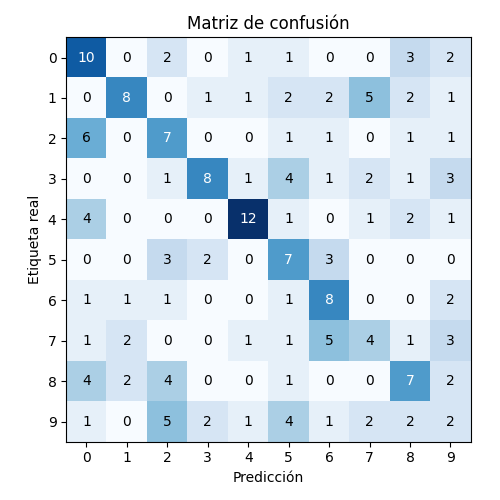

              precision    recall  f1-score   support

           0      0.370     0.526     0.435        19
           1      0.615     0.364     0.457        22
           2      0.304     0.412     0.350        17
           3      0.615     0.381     0.471        21
           4      0.706     0.571     0.632        21
           5      0.304     0.467     0.368        15
           6      0.381     0.571     0.457        14
           7      0.286     0.222     0.250        18
           8      0.368     0.350     0.359        20
           9      0.118     0.100     0.108        20

    accuracy                          0.390       187
   macro avg      0.407     0.396     0.389       187
weighted avg      0.418     0.390     0.391       187



In [56]:
test_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_dataset = datasets.ImageFolder('wikiart/images/test', transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=512)

targets, predictions = [], []
for mbdata, label in test_loader:
    logits = model2.forward(mbdata)
    predictions.append(logits.argmax(dim=1).detach().numpy())
    targets.append(label.numpy())
predictions = np.concatenate(predictions)
targets = np.concatenate(targets)

from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')

cm = confusion_matrix(y_true=targets, y_pred=predictions)
plot_confusion_matrix(cm, labels=[str(i) for i in range(10)])

print(classification_report(targets, predictions, digits=3))

###### Modelo #3

In [57]:
from torchvision import models

model3 = models.resnet18(pretrained=True, progress=True)

In [58]:
#Se congelan n capas
count = 0
for child in model3.children():
  count+=1
  if count < 6: #Cambiar n por la cantidad de capas a congelar +1
    for param in child.parameters():
        param.requires_grad = False

In [59]:
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Loss, Accuracy
from ignite.handlers import ModelCheckpoint, EarlyStopping
from ignite.engine import Engine

# Recuperamos el número de neuronas de la última capa
neurons = model3.fc.in_features 
# La reemplazamos por una nueva capa de salida
model3.fc = torch.nn.Linear(neurons, 10) 

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=1e-3)
max_epochs = 100

device = torch.device('cpu')
#device = torch.device('cuda')

model3 = model3.to(device)

# Esto es lo que hace el engine de entrenamiento
def train_one_step(engine, batch):
    optimizer.zero_grad()
    x, y = batch
    x, y = x.to(device), y.to(device)
    yhat = model3.forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    return loss.item() # Este output puede llamar luego como trainer.state.output

# Esto es lo que hace el engine de evaluación
def evaluate_one_step(engine, batch):
    with torch.no_grad():
        x, y = batch
        x, y = x.to(device), y.to(device)
        yhat = model3.forward(x)
        #loss = criterion(yhat, y)
        return yhat, y

trainer = Engine(train_one_step)
evaluator = Engine(evaluate_one_step)
early_stopping = EarlyStopping(patience=10, score_function=lambda engine: -engine.state.metrics['Loss'], trainer=trainer)
metrics = {'Loss': Loss(criterion), 'Acc': Accuracy()}
for name, metric in metrics.items():
    metric.attach(evaluator, name)

In [60]:
import time
from torch.utils.tensorboard import SummaryWriter
from ignite.handlers import ModelCheckpoint

# Contexto de escritura de datos para tensorboard
with SummaryWriter(log_dir=f'/tmp/tensorboard/run{time.time_ns()}') as writer:

    @trainer.on(Events.EPOCH_COMPLETED(every=1)) # Cada 1 epocas
    def log_results(engine):
        # Evaluo el conjunto de entrenamiento
        evaluator.run(train_loader) 
        writer.add_scalar("train/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("train/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
        # Evaluo el conjunto de validación
        evaluator.run(valid_loader) 
        writer.add_scalar("valid/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("valid/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
    # Guardo el mejor modelo en validación
    best_model_handler = ModelCheckpoint(dirname='.', require_empty=False, filename_prefix="best", n_saved=1,
                                         score_function=lambda engine: -engine.state.metrics['Loss'],
                                         score_name="val_loss")

    # Lo siguiente se ejecuta cada ves que termine el loop de validación
    evaluator.add_event_handler(Events.COMPLETED,
                                best_model_handler, {'resnet18v3': model3})
    evaluator.add_event_handler(Events.COMPLETED, early_stopping)

    trainer.run(train_loader, max_epochs=max_epochs)

In [94]:
model3.load_state_dict(torch.load('best_resnet18v3_val_loss=-0.9581.pt'))

<All keys matched successfully>

<IPython.core.display.Javascript object>


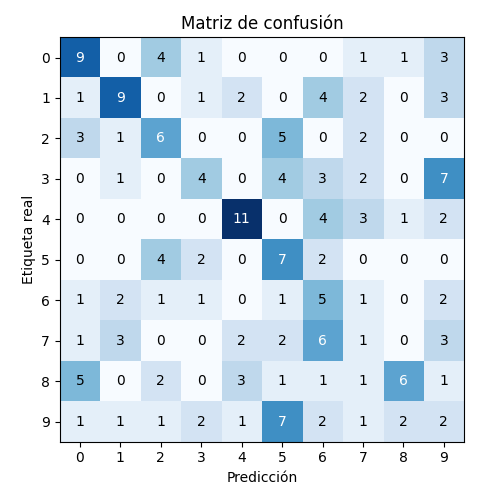

              precision    recall  f1-score   support

           0      0.429     0.474     0.450        19
           1      0.529     0.409     0.462        22
           2      0.333     0.353     0.343        17
           3      0.364     0.190     0.250        21
           4      0.579     0.524     0.550        21
           5      0.259     0.467     0.333        15
           6      0.185     0.357     0.244        14
           7      0.071     0.056     0.062        18
           8      0.600     0.300     0.400        20
           9      0.087     0.100     0.093        20

    accuracy                          0.321       187
   macro avg      0.344     0.323     0.319       187
weighted avg      0.357     0.321     0.325       187



In [95]:
test_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_dataset = datasets.ImageFolder('wikiart/images/test', transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=512)

targets, predictions = [], []
for mbdata, label in test_loader:
    logits = model3.forward(mbdata)
    predictions.append(logits.argmax(dim=1).detach().numpy())
    targets.append(label.numpy())
predictions = np.concatenate(predictions)
targets = np.concatenate(targets)

from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')

cm = confusion_matrix(y_true=targets, y_pred=predictions)
plot_confusion_matrix(cm, labels=[str(i) for i in range(10)])

print(classification_report(targets, predictions, digits=3))

##### ResNet34

###### Modelo #4

In [61]:
from torchvision import models

model4 = models.resnet34(pretrained=True, progress=True)
display(model4)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [62]:
count = 0
for child in model4.children():
    count+=1
print(count)

10


In [63]:
#Se congelan n capas
count = 0
for child in model4.children():
  count+=1
  if count < 8: #Cambiar n por la cantidad de capas a congelar +1
    for param in child.parameters():
        param.requires_grad = False

In [64]:
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Loss, Accuracy
from ignite.handlers import ModelCheckpoint, EarlyStopping
from ignite.engine import Engine

# Recuperamos el número de neuronas de la última capa
neurons = model4.fc.in_features 
# La reemplazamos por una nueva capa de salida
model4.fc = torch.nn.Linear(neurons, 10) 

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model4.parameters(), lr=1e-3)
max_epochs = 100

device = torch.device('cpu')
#device = torch.device('cuda')

model4 = model4.to(device)

# Esto es lo que hace el engine de entrenamiento
def train_one_step(engine, batch):
    optimizer.zero_grad()
    x, y = batch
    x, y = x.to(device), y.to(device)
    yhat = model4.forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    return loss.item() # Este output puede llamar luego como trainer.state.output

# Esto es lo que hace el engine de evaluación
def evaluate_one_step(engine, batch):
    with torch.no_grad():
        x, y = batch
        x, y = x.to(device), y.to(device)
        yhat = model4.forward(x)
        #loss = criterion(yhat, y)
        return yhat, y

trainer = Engine(train_one_step)
evaluator = Engine(evaluate_one_step)
early_stopping = EarlyStopping(patience=5, score_function=lambda engine: -engine.state.metrics['Loss'], trainer=trainer)
metrics = {'Loss': Loss(criterion), 'Acc': Accuracy()}
for name, metric in metrics.items():
    metric.attach(evaluator, name)

In [65]:
import time
from torch.utils.tensorboard import SummaryWriter
from ignite.handlers import ModelCheckpoint

# Contexto de escritura de datos para tensorboard
with SummaryWriter(log_dir=f'/tmp/tensorboard/run{time.time_ns()}') as writer:

    @trainer.on(Events.EPOCH_COMPLETED(every=1)) # Cada 1 epocas
    def log_results(engine):
        # Evaluo el conjunto de entrenamiento
        evaluator.run(train_loader) 
        writer.add_scalar("train/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("train/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
        # Evaluo el conjunto de validación
        evaluator.run(valid_loader) 
        writer.add_scalar("valid/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("valid/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
    # Guardo el mejor modelo en validación
    best_model_handler = ModelCheckpoint(dirname='.', require_empty=False, filename_prefix="best", n_saved=1,
                                         score_function=lambda engine: -engine.state.metrics['Loss'],
                                         score_name="val_loss")

    # Lo siguiente se ejecuta cada ves que termine el loop de validación
    evaluator.add_event_handler(Events.COMPLETED,
                                best_model_handler, {'resnet34': model4})
    evaluator.add_event_handler(Events.COMPLETED, early_stopping)

    trainer.run(train_loader, max_epochs=max_epochs)

In [96]:
model4.load_state_dict(torch.load('best_resnet34_val_loss=-0.9003.pt'))

<All keys matched successfully>

<IPython.core.display.Javascript object>


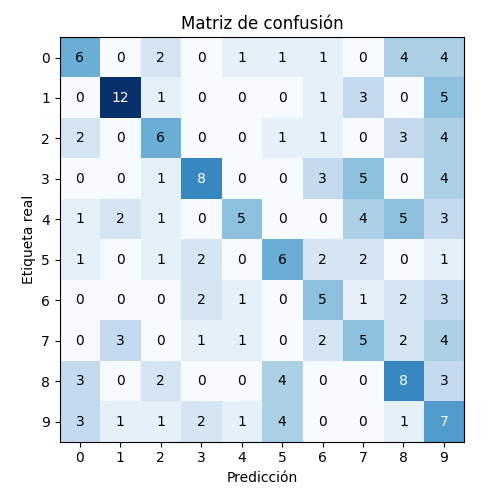

              precision    recall  f1-score   support

           0      0.375     0.316     0.343        19
           1      0.667     0.545     0.600        22
           2      0.400     0.353     0.375        17
           3      0.533     0.381     0.444        21
           4      0.556     0.238     0.333        21
           5      0.375     0.400     0.387        15
           6      0.333     0.357     0.345        14
           7      0.250     0.278     0.263        18
           8      0.320     0.400     0.356        20
           9      0.184     0.350     0.241        20

    accuracy                          0.364       187
   macro avg      0.399     0.362     0.369       187
weighted avg      0.408     0.364     0.373       187



In [97]:
test_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_dataset = datasets.ImageFolder('wikiart/images/test', transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=512)

targets, predictions = [], []
for mbdata, label in test_loader:
    logits = model4.forward(mbdata)
    predictions.append(logits.argmax(dim=1).detach().numpy())
    targets.append(label.numpy())
predictions = np.concatenate(predictions)
targets = np.concatenate(targets)

from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')

cm = confusion_matrix(y_true=targets, y_pred=predictions)
plot_confusion_matrix(cm, labels=[str(i) for i in range(10)])

print(classification_report(targets, predictions, digits=3))

###### Modelo #5

In [71]:
from torchvision import models

model5 = models.resnet34(pretrained=True, progress=True)

In [72]:
#Se congelan n capas
count = 0
for child in model5.children():
  count+=1
  if count < 7: #Cambiar n por la cantidad de capas a congelar +1
    for param in child.parameters():
        param.requires_grad = False

In [73]:
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Loss, Accuracy
from ignite.handlers import ModelCheckpoint, EarlyStopping
from ignite.engine import Engine

# Recuperamos el número de neuronas de la última capa
neurons = model5.fc.in_features 
# La reemplazamos por una nueva capa de salida
model5.fc = torch.nn.Linear(neurons, 10) 

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model5.parameters(), lr=1e-3)
max_epochs = 100

device = torch.device('cpu')
#device = torch.device('cuda')

model5 = model5.to(device)

# Esto es lo que hace el engine de entrenamiento
def train_one_step(engine, batch):
    optimizer.zero_grad()
    x, y = batch
    x, y = x.to(device), y.to(device)
    yhat = model5.forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    return loss.item() # Este output puede llamar luego como trainer.state.output

# Esto es lo que hace el engine de evaluación
def evaluate_one_step(engine, batch):
    with torch.no_grad():
        x, y = batch
        x, y = x.to(device), y.to(device)
        yhat = model5.forward(x)
        #loss = criterion(yhat, y)
        return yhat, y

trainer = Engine(train_one_step)
evaluator = Engine(evaluate_one_step)
early_stopping = EarlyStopping(patience=5, score_function=lambda engine: -engine.state.metrics['Loss'], trainer=trainer)
metrics = {'Loss': Loss(criterion), 'Acc': Accuracy()}
for name, metric in metrics.items():
    metric.attach(evaluator, name)

In [74]:
import time
from torch.utils.tensorboard import SummaryWriter
from ignite.handlers import ModelCheckpoint

# Contexto de escritura de datos para tensorboard
with SummaryWriter(log_dir=f'/tmp/tensorboard/run{time.time_ns()}') as writer:

    @trainer.on(Events.EPOCH_COMPLETED(every=1)) # Cada 1 epocas
    def log_results(engine):
        # Evaluo el conjunto de entrenamiento
        evaluator.run(train_loader) 
        writer.add_scalar("train/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("train/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
        # Evaluo el conjunto de validación
        evaluator.run(valid_loader) 
        writer.add_scalar("valid/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("valid/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
    # Guardo el mejor modelo en validación
    best_model_handler = ModelCheckpoint(dirname='.', require_empty=False, filename_prefix="best", n_saved=1,
                                         score_function=lambda engine: -engine.state.metrics['Loss'],
                                         score_name="val_loss")

    # Lo siguiente se ejecuta cada ves que termine el loop de validación
    evaluator.add_event_handler(Events.COMPLETED,
                                best_model_handler, {'resnet34v2': model5})
    evaluator.add_event_handler(Events.COMPLETED, early_stopping)

    trainer.run(train_loader, max_epochs=max_epochs)

In [98]:
model5.load_state_dict(torch.load('best_resnet34v2_val_loss=-0.8388.pt'))

<All keys matched successfully>

<IPython.core.display.Javascript object>


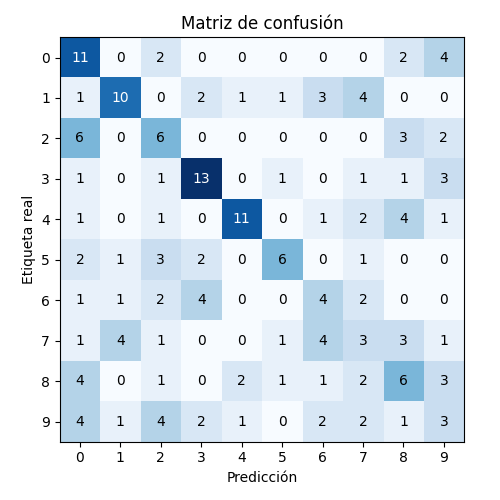

              precision    recall  f1-score   support

           0      0.344     0.579     0.431        19
           1      0.588     0.455     0.513        22
           2      0.286     0.353     0.316        17
           3      0.565     0.619     0.591        21
           4      0.733     0.524     0.611        21
           5      0.600     0.400     0.480        15
           6      0.267     0.286     0.276        14
           7      0.176     0.167     0.171        18
           8      0.300     0.300     0.300        20
           9      0.176     0.150     0.162        20

    accuracy                          0.390       187
   macro avg      0.404     0.383     0.385       187
weighted avg      0.412     0.390     0.393       187



In [99]:
test_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_dataset = datasets.ImageFolder('wikiart/images/test', transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=512)

targets, predictions = [], []
for mbdata, label in test_loader:
    logits = model5.forward(mbdata)
    predictions.append(logits.argmax(dim=1).detach().numpy())
    targets.append(label.numpy())
predictions = np.concatenate(predictions)
targets = np.concatenate(targets)

from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')

cm = confusion_matrix(y_true=targets, y_pred=predictions)
plot_confusion_matrix(cm, labels=[str(i) for i in range(10)])

print(classification_report(targets, predictions, digits=3))

###### Modelo #6

In [75]:
from torchvision import models

model6 = models.resnet34(pretrained=True, progress=True)

In [76]:
#Se congelan n capas
count = 0
for child in model6.children():
  count+=1
  if count < 6: #Cambiar n por la cantidad de capas a congelar +1
    for param in child.parameters():
        param.requires_grad = False

In [77]:
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Loss, Accuracy
from ignite.handlers import ModelCheckpoint, EarlyStopping
from ignite.engine import Engine

# Recuperamos el número de neuronas de la última capa
neurons = model6.fc.in_features 
# La reemplazamos por una nueva capa de salida
model6.fc = torch.nn.Linear(neurons, 10) 

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model6.parameters(), lr=1e-3)
max_epochs = 100

device = torch.device('cpu')
#device = torch.device('cuda')

model6 = model6.to(device)

# Esto es lo que hace el engine de entrenamiento
def train_one_step(engine, batch):
    optimizer.zero_grad()
    x, y = batch
    x, y = x.to(device), y.to(device)
    yhat = model6.forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    return loss.item() # Este output puede llamar luego como trainer.state.output

# Esto es lo que hace el engine de evaluación
def evaluate_one_step(engine, batch):
    with torch.no_grad():
        x, y = batch
        x, y = x.to(device), y.to(device)
        yhat = model6.forward(x)
        #loss = criterion(yhat, y)
        return yhat, y

trainer = Engine(train_one_step)
evaluator = Engine(evaluate_one_step)
early_stopping = EarlyStopping(patience=5, score_function=lambda engine: -engine.state.metrics['Loss'], trainer=trainer)
metrics = {'Loss': Loss(criterion), 'Acc': Accuracy()}
for name, metric in metrics.items():
    metric.attach(evaluator, name)

In [78]:
import time
from torch.utils.tensorboard import SummaryWriter
from ignite.handlers import ModelCheckpoint

# Contexto de escritura de datos para tensorboard
with SummaryWriter(log_dir=f'/tmp/tensorboard/run{time.time_ns()}') as writer:

    @trainer.on(Events.EPOCH_COMPLETED(every=1)) # Cada 1 epocas
    def log_results(engine):
        # Evaluo el conjunto de entrenamiento
        evaluator.run(train_loader) 
        writer.add_scalar("train/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("train/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
        # Evaluo el conjunto de validación
        evaluator.run(valid_loader) 
        writer.add_scalar("valid/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("valid/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
    # Guardo el mejor modelo en validación
    best_model_handler = ModelCheckpoint(dirname='.', require_empty=False, filename_prefix="best", n_saved=1,
                                         score_function=lambda engine: -engine.state.metrics['Loss'],
                                         score_name="val_loss")

    # Lo siguiente se ejecuta cada ves que termine el loop de validación
    evaluator.add_event_handler(Events.COMPLETED,
                                best_model_handler, {'resnet34v3': model6})
    evaluator.add_event_handler(Events.COMPLETED, early_stopping)

    trainer.run(train_loader, max_epochs=max_epochs)

In [100]:
model6.load_state_dict(torch.load('best_resnet34v3_val_loss=-1.7475.pt'))

<All keys matched successfully>

<IPython.core.display.Javascript object>


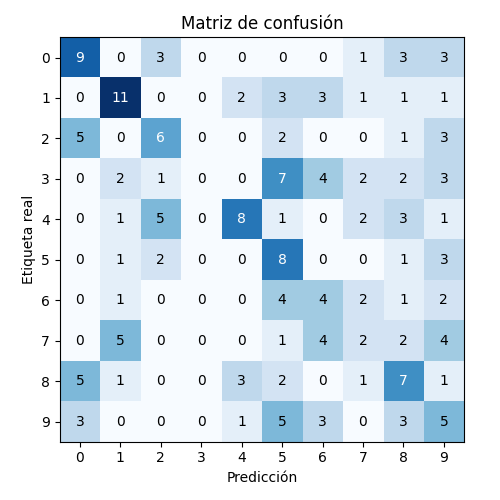

              precision    recall  f1-score   support

           0      0.409     0.474     0.439        19
           1      0.500     0.500     0.500        22
           2      0.353     0.353     0.353        17
           3      0.000     0.000     0.000        21
           4      0.571     0.381     0.457        21
           5      0.242     0.533     0.333        15
           6      0.222     0.286     0.250        14
           7      0.182     0.111     0.138        18
           8      0.292     0.350     0.318        20
           9      0.192     0.250     0.217        20

    accuracy                          0.321       187
   macro avg      0.296     0.324     0.301       187
weighted avg      0.302     0.321     0.303       187



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
test_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_dataset = datasets.ImageFolder('wikiart/images/test', transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=512)

targets, predictions = [], []
for mbdata, label in test_loader:
    logits = model6.forward(mbdata)
    predictions.append(logits.argmax(dim=1).detach().numpy())
    targets.append(label.numpy())
predictions = np.concatenate(predictions)
targets = np.concatenate(targets)

from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')

cm = confusion_matrix(y_true=targets, y_pred=predictions)
plot_confusion_matrix(cm, labels=[str(i) for i in range(10)])

print(classification_report(targets, predictions, digits=3))

##### ResNet50

###### Modelo #7

In [79]:
from torchvision import models

model7 = models.resnet50(pretrained=True, progress=True)
display(model7)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [80]:
count = 0
for child in model7.children():
    count+=1
print(count)

10


In [81]:
#Se congelan n capas
count = 0
for child in model7.children():
  count+=1
  if count < 8: #Cambiar n por la cantidad de capas a congelar +1
    for param in child.parameters():
        param.requires_grad = False

In [82]:
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Loss, Accuracy
from ignite.handlers import ModelCheckpoint, EarlyStopping
from ignite.engine import Engine

# Recuperamos el número de neuronas de la última capa
neurons = model7.fc.in_features 
# La reemplazamos por una nueva capa de salida
model7.fc = torch.nn.Linear(neurons, 10) 

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model7.parameters(), lr=1e-3)
max_epochs = 100

device = torch.device('cpu')
#device = torch.device('cuda')

model7 = model7.to(device)

# Esto es lo que hace el engine de entrenamiento
def train_one_step(engine, batch):
    optimizer.zero_grad()
    x, y = batch
    x, y = x.to(device), y.to(device)
    yhat = model7.forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    return loss.item() # Este output puede llamar luego como trainer.state.output

# Esto es lo que hace el engine de evaluación
def evaluate_one_step(engine, batch):
    with torch.no_grad():
        x, y = batch
        x, y = x.to(device), y.to(device)
        yhat = model7.forward(x)
        #loss = criterion(yhat, y)
        return yhat, y

trainer = Engine(train_one_step)
evaluator = Engine(evaluate_one_step)
early_stopping = EarlyStopping(patience=5, score_function=lambda engine: -engine.state.metrics['Loss'], trainer=trainer)
metrics = {'Loss': Loss(criterion), 'Acc': Accuracy()}
for name, metric in metrics.items():
    metric.attach(evaluator, name)

In [83]:
import time
from torch.utils.tensorboard import SummaryWriter
from ignite.handlers import ModelCheckpoint

# Contexto de escritura de datos para tensorboard
with SummaryWriter(log_dir=f'/tmp/tensorboard/run{time.time_ns()}') as writer:

    @trainer.on(Events.EPOCH_COMPLETED(every=1)) # Cada 1 epocas
    def log_results(engine):
        # Evaluo el conjunto de entrenamiento
        evaluator.run(train_loader) 
        writer.add_scalar("train/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("train/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
        # Evaluo el conjunto de validación
        evaluator.run(valid_loader) 
        writer.add_scalar("valid/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("valid/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
    # Guardo el mejor modelo en validación
    best_model_handler = ModelCheckpoint(dirname='.', require_empty=False, filename_prefix="best", n_saved=1,
                                         score_function=lambda engine: -engine.state.metrics['Loss'],
                                         score_name="val_loss")

    # Lo siguiente se ejecuta cada ves que termine el loop de validación
    evaluator.add_event_handler(Events.COMPLETED,
                                best_model_handler, {'resnet50': model7})
    evaluator.add_event_handler(Events.COMPLETED, early_stopping)

    trainer.run(train_loader, max_epochs=max_epochs)

In [102]:
model7.load_state_dict(torch.load('best_resnet50_val_loss=-0.7483.pt'))

<All keys matched successfully>

<IPython.core.display.Javascript object>


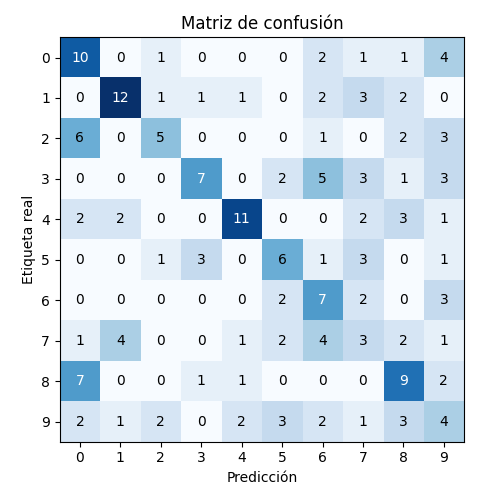

              precision    recall  f1-score   support

           0      0.357     0.526     0.426        19
           1      0.632     0.545     0.585        22
           2      0.500     0.294     0.370        17
           3      0.583     0.333     0.424        21
           4      0.688     0.524     0.595        21
           5      0.400     0.400     0.400        15
           6      0.292     0.500     0.368        14
           7      0.167     0.167     0.167        18
           8      0.391     0.450     0.419        20
           9      0.182     0.200     0.190        20

    accuracy                          0.396       187
   macro avg      0.419     0.394     0.394       187
weighted avg      0.430     0.396     0.401       187



In [103]:
test_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_dataset = datasets.ImageFolder('wikiart/images/test', transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=512)

targets, predictions = [], []
for mbdata, label in test_loader:
    logits = model7.forward(mbdata)
    predictions.append(logits.argmax(dim=1).detach().numpy())
    targets.append(label.numpy())
predictions = np.concatenate(predictions)
targets = np.concatenate(targets)

from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')

cm = confusion_matrix(y_true=targets, y_pred=predictions)
plot_confusion_matrix(cm, labels=[str(i) for i in range(10)])

print(classification_report(targets, predictions, digits=3))

###### Modelo #8

In [84]:
from torchvision import models

model8 = models.resnet50(pretrained=True, progress=True)

In [85]:
#Se congelan n capas
count = 0
for child in model8.children():
  count+=1
  if count < 7: #Cambiar n por la cantidad de capas a congelar +1
    for param in child.parameters():
        param.requires_grad = False

In [87]:
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Loss, Accuracy
from ignite.handlers import ModelCheckpoint, EarlyStopping
from ignite.engine import Engine

# Recuperamos el número de neuronas de la última capa
neurons = model8.fc.in_features 
# La reemplazamos por una nueva capa de salida
model8.fc = torch.nn.Linear(neurons, 10) 

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model8.parameters(), lr=1e-3)
max_epochs = 100

device = torch.device('cpu')
#device = torch.device('cuda')

model8 = model8.to(device)

# Esto es lo que hace el engine de entrenamiento
def train_one_step(engine, batch):
    optimizer.zero_grad()
    x, y = batch
    x, y = x.to(device), y.to(device)
    yhat = model8.forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    return loss.item() # Este output puede llamar luego como trainer.state.output

# Esto es lo que hace el engine de evaluación
def evaluate_one_step(engine, batch):
    with torch.no_grad():
        x, y = batch
        x, y = x.to(device), y.to(device)
        yhat = model8.forward(x)
        #loss = criterion(yhat, y)
        return yhat, y

trainer = Engine(train_one_step)
evaluator = Engine(evaluate_one_step)
early_stopping = EarlyStopping(patience=5, score_function=lambda engine: -engine.state.metrics['Loss'], trainer=trainer)
metrics = {'Loss': Loss(criterion), 'Acc': Accuracy()}
for name, metric in metrics.items():
    metric.attach(evaluator, name)

In [88]:
import time
from torch.utils.tensorboard import SummaryWriter
from ignite.handlers import ModelCheckpoint

# Contexto de escritura de datos para tensorboard
with SummaryWriter(log_dir=f'/tmp/tensorboard/run{time.time_ns()}') as writer:

    @trainer.on(Events.EPOCH_COMPLETED(every=1)) # Cada 1 epocas
    def log_results(engine):
        # Evaluo el conjunto de entrenamiento
        evaluator.run(train_loader) 
        writer.add_scalar("train/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("train/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
        # Evaluo el conjunto de validación
        evaluator.run(valid_loader) 
        writer.add_scalar("valid/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("valid/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
    # Guardo el mejor modelo en validación
    best_model_handler = ModelCheckpoint(dirname='.', require_empty=False, filename_prefix="best", n_saved=1,
                                         score_function=lambda engine: -engine.state.metrics['Loss'],
                                         score_name="val_loss")

    # Lo siguiente se ejecuta cada ves que termine el loop de validación
    evaluator.add_event_handler(Events.COMPLETED,
                                best_model_handler, {'resnet50v2': model8})
    evaluator.add_event_handler(Events.COMPLETED, early_stopping)

    trainer.run(train_loader, max_epochs=max_epochs)

In [104]:
model8.load_state_dict(torch.load('best_resnet50v2_val_loss=-1.1050.pt'))

<All keys matched successfully>

<IPython.core.display.Javascript object>


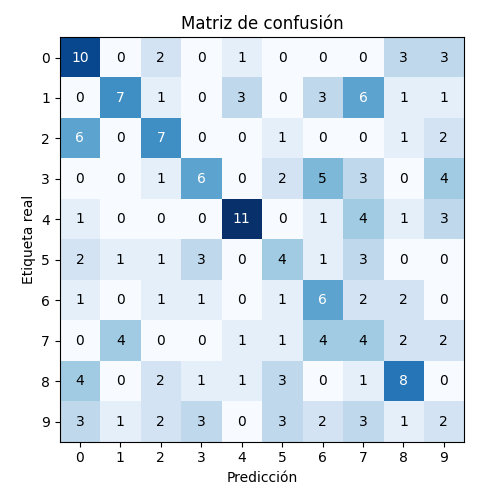

              precision    recall  f1-score   support

           0      0.370     0.526     0.435        19
           1      0.538     0.318     0.400        22
           2      0.412     0.412     0.412        17
           3      0.429     0.286     0.343        21
           4      0.647     0.524     0.579        21
           5      0.267     0.267     0.267        15
           6      0.273     0.429     0.333        14
           7      0.154     0.222     0.182        18
           8      0.421     0.400     0.410        20
           9      0.118     0.100     0.108        20

    accuracy                          0.348       187
   macro avg      0.363     0.348     0.347       187
weighted avg      0.373     0.348     0.351       187



In [105]:
test_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_dataset = datasets.ImageFolder('wikiart/images/test', transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=512)

targets, predictions = [], []
for mbdata, label in test_loader:
    logits = model8.forward(mbdata)
    predictions.append(logits.argmax(dim=1).detach().numpy())
    targets.append(label.numpy())
predictions = np.concatenate(predictions)
targets = np.concatenate(targets)

from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')

cm = confusion_matrix(y_true=targets, y_pred=predictions)
plot_confusion_matrix(cm, labels=[str(i) for i in range(10)])

print(classification_report(targets, predictions, digits=3))

###### Modelo #9

In [89]:
from torchvision import models

model9 = models.resnet50(pretrained=True, progress=True)

In [90]:
#Se congelan n capas
count = 0
for child in model9.children():
  count+=1
  if count < 6: #Cambiar n por la cantidad de capas a congelar +1
    for param in child.parameters():
        param.requires_grad = False

In [92]:
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Loss, Accuracy
from ignite.handlers import ModelCheckpoint, EarlyStopping
from ignite.engine import Engine

# Recuperamos el número de neuronas de la última capa
neurons = model9.fc.in_features 
# La reemplazamos por una nueva capa de salida
model9.fc = torch.nn.Linear(neurons, 10) 

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model9.parameters(), lr=1e-3)
max_epochs = 100

device = torch.device('cpu')
#device = torch.device('cuda')

model9 = model9.to(device)

# Esto es lo que hace el engine de entrenamiento
def train_one_step(engine, batch):
    optimizer.zero_grad()
    x, y = batch
    x, y = x.to(device), y.to(device)
    yhat = model9.forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    return loss.item() # Este output puede llamar luego como trainer.state.output

# Esto es lo que hace el engine de evaluación
def evaluate_one_step(engine, batch):
    with torch.no_grad():
        x, y = batch
        x, y = x.to(device), y.to(device)
        yhat = model9.forward(x)
        #loss = criterion(yhat, y)
        return yhat, y

trainer = Engine(train_one_step)
evaluator = Engine(evaluate_one_step)
early_stopping = EarlyStopping(patience=5, score_function=lambda engine: -engine.state.metrics['Loss'], trainer=trainer)
metrics = {'Loss': Loss(criterion), 'Acc': Accuracy()}
for name, metric in metrics.items():
    metric.attach(evaluator, name)

In [93]:
import time
from torch.utils.tensorboard import SummaryWriter
from ignite.handlers import ModelCheckpoint

# Contexto de escritura de datos para tensorboard
with SummaryWriter(log_dir=f'/tmp/tensorboard/run{time.time_ns()}') as writer:

    @trainer.on(Events.EPOCH_COMPLETED(every=1)) # Cada 1 epocas
    def log_results(engine):
        # Evaluo el conjunto de entrenamiento
        evaluator.run(train_loader) 
        writer.add_scalar("train/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("train/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
        # Evaluo el conjunto de validación
        evaluator.run(valid_loader) 
        writer.add_scalar("valid/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("valid/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
    # Guardo el mejor modelo en validación
    best_model_handler = ModelCheckpoint(dirname='.', require_empty=False, filename_prefix="best", n_saved=1,
                                         score_function=lambda engine: -engine.state.metrics['Loss'],
                                         score_name="val_loss")

    # Lo siguiente se ejecuta cada ves que termine el loop de validación
    evaluator.add_event_handler(Events.COMPLETED,
                                best_model_handler, {'resnet50v3': model9})
    evaluator.add_event_handler(Events.COMPLETED, early_stopping)

    trainer.run(train_loader, max_epochs=max_epochs)

Engine run is terminating due to exception: .


KeyboardInterrupt: 

In [106]:
model9.load_state_dict(torch.load('best_resnet50v3_val_loss=-1.7455.pt'))

<All keys matched successfully>

<IPython.core.display.Javascript object>


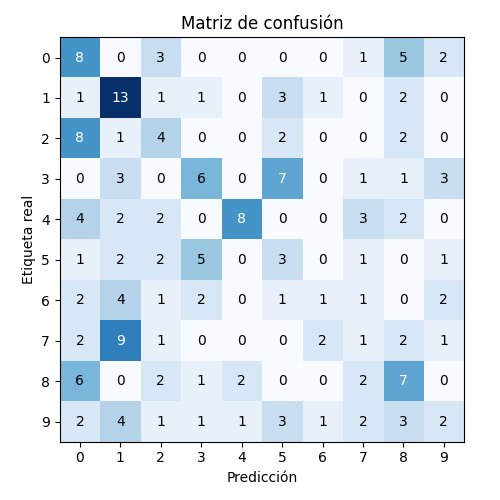

              precision    recall  f1-score   support

           0      0.235     0.421     0.302        19
           1      0.342     0.591     0.433        22
           2      0.235     0.235     0.235        17
           3      0.375     0.286     0.324        21
           4      0.727     0.381     0.500        21
           5      0.158     0.200     0.176        15
           6      0.200     0.071     0.105        14
           7      0.083     0.056     0.067        18
           8      0.292     0.350     0.318        20
           9      0.182     0.100     0.129        20

    accuracy                          0.283       187
   macro avg      0.283     0.269     0.259       187
weighted avg      0.296     0.283     0.272       187



In [107]:
test_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_dataset = datasets.ImageFolder('wikiart/images/test', transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=512)

targets, predictions = [], []
for mbdata, label in test_loader:
    logits = model9.forward(mbdata)
    predictions.append(logits.argmax(dim=1).detach().numpy())
    targets.append(label.numpy())
predictions = np.concatenate(predictions)
targets = np.concatenate(targets)

from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')

cm = confusion_matrix(y_true=targets, y_pred=predictions)
plot_confusion_matrix(cm, labels=[str(i) for i in range(10)])

print(classification_report(targets, predictions, digits=3))

##### MobileNet V2

###### Modelo #10

In [14]:
from torchvision import models

model10 = models.mobilenet_v2(pretrained=True, progress=True)
display(model10)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /Users/mary/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [16]:
count = 0
for child in model10.children():
    count+=1
print(count)

2


In [17]:
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Loss, Accuracy
from ignite.handlers import ModelCheckpoint, EarlyStopping
from ignite.engine import Engine

# Recuperamos el número de neuronas de la última capa
neurons = model4.classifier[1].in_features 
# La reemplazamos por una nueva capa de salida
model4.classifier[1] = torch.nn.Linear(neurons, 10) 

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model4.parameters(), lr=1e-3)
max_epochs = 100

device = torch.device('cpu')
#device = torch.device('cuda')

model4 = model4.to(device)

# Esto es lo que hace el engine de entrenamiento
def train_one_step(engine, batch):
    optimizer.zero_grad()
    x, y = batch
    x, y = x.to(device), y.to(device)
    yhat = model4.forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    return loss.item() # Este output puede llamar luego como trainer.state.output

# Esto es lo que hace el engine de evaluación
def evaluate_one_step(engine, batch):
    with torch.no_grad():
        x, y = batch
        x, y = x.to(device), y.to(device)
        yhat = model4.forward(x)
        #loss = criterion(yhat, y)
        return yhat, y

trainer = Engine(train_one_step)
evaluator = Engine(evaluate_one_step)
early_stopping = EarlyStopping(patience=5, score_function=lambda engine: -engine.state.metrics['Loss'], trainer=trainer)
metrics = {'Loss': Loss(criterion), 'Acc': Accuracy()}
for name, metric in metrics.items():
    metric.attach(evaluator, name)

In [18]:
import time
from torch.utils.tensorboard import SummaryWriter
from ignite.handlers import ModelCheckpoint

# Contexto de escritura de datos para tensorboard
with SummaryWriter(log_dir=f'/tmp/tensorboard/run{time.time_ns()}') as writer:

    @trainer.on(Events.EPOCH_COMPLETED(every=1)) # Cada 1 epocas
    def log_results(engine):
        # Evaluo el conjunto de entrenamiento
        evaluator.run(train_loader) 
        writer.add_scalar("train/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("train/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
        # Evaluo el conjunto de validación
        evaluator.run(valid_loader) 
        writer.add_scalar("valid/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("valid/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
    # Guardo el mejor modelo en validación
    best_model_handler = ModelCheckpoint(dirname='.', require_empty=False, filename_prefix="best", n_saved=1,
                                         score_function=lambda engine: -engine.state.metrics['Loss'],
                                         score_name="val_loss")

    # Lo siguiente se ejecuta cada ves que termine el loop de validación
    evaluator.add_event_handler(Events.COMPLETED,
                                best_model_handler, {'mobilenet': model10})
    evaluator.add_event_handler(Events.COMPLETED, early_stopping)

    trainer.run(train_loader, max_epochs=max_epochs)

In [19]:
model10.load_state_dict(torch.load('best_mobilenet_val_loss=-0.8023.pt'))

<All keys matched successfully>

<IPython.core.display.Javascript object>


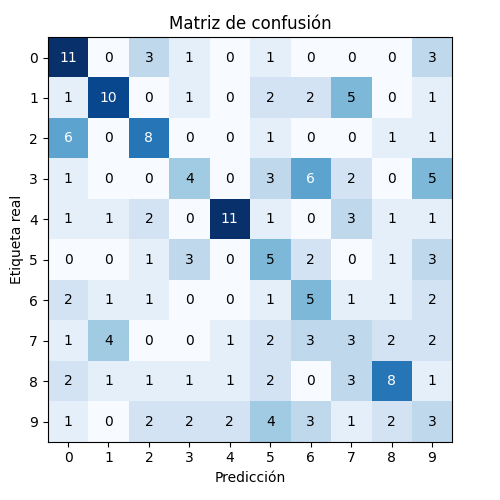

              precision    recall  f1-score   support

           0      0.423     0.579     0.489        19
           1      0.588     0.455     0.513        22
           2      0.444     0.471     0.457        17
           3      0.333     0.190     0.242        21
           4      0.733     0.524     0.611        21
           5      0.227     0.333     0.270        15
           6      0.238     0.357     0.286        14
           7      0.167     0.167     0.167        18
           8      0.500     0.400     0.444        20
           9      0.136     0.150     0.143        20

    accuracy                          0.364       187
   macro avg      0.379     0.363     0.362       187
weighted avg      0.393     0.364     0.369       187



In [23]:
test_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_dataset = datasets.ImageFolder('wikiart/images/test', transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=512)

targets, predictions = [], []
for mbdata, label in test_loader:
    logits = model10.forward(mbdata)
    predictions.append(logits.argmax(dim=1).detach().numpy())
    targets.append(label.numpy())
predictions = np.concatenate(predictions)
targets = np.concatenate(targets)

from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')

cm = confusion_matrix(y_true=targets, y_pred=predictions)
plot_confusion_matrix(cm, labels=[str(i) for i in range(10)])

print(classification_report(targets, predictions, digits=3))

### Gráficos de Entrenamiento

#### ResNet18

##### Modelo #1

###### Train Accy/Train Loss

![train_18](images/train_18.png)

###### Valid Accy/Valid Loss

![valid_18](images/valid_18.png)

##### Modelo #2

###### Train Accy/Train Loss

![train_18v2](images/train_18v2.png)

###### Valid Accy/Valid Loss

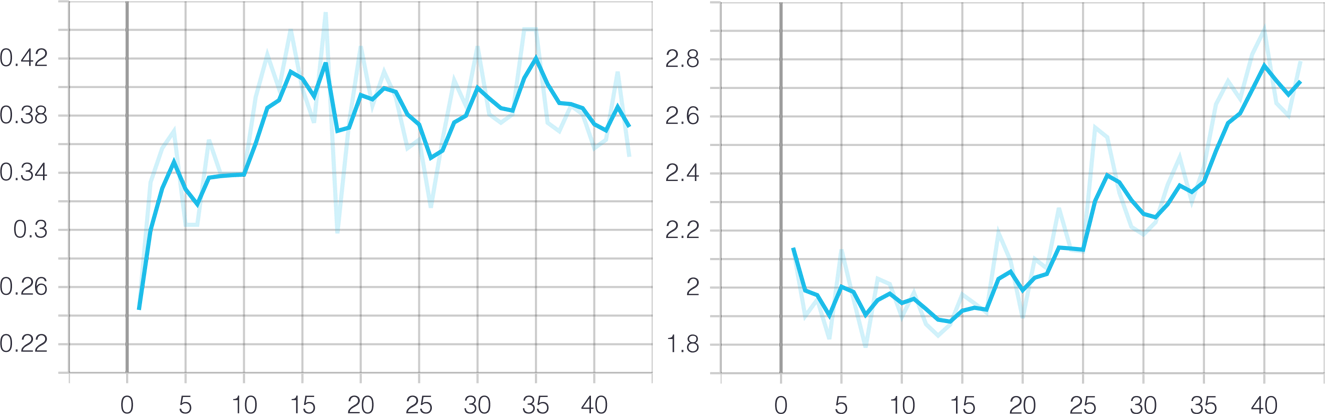

##### Modelo #3

###### Train Accy/Train Loss

![train_18v3](images/train_18v3.png)

###### Valid Accy/Valid Loss

![valid_18v3](images/valid_18v3.png)

#### ResNet34

##### Modelo #4

###### Train Accy/Train Loss

![train_34](images/train_34.png)

###### Valid Accy/Valid Loss

![valid_34](images/valid_34.png)

##### Modelo #5

###### Train Accy/Train Loss

![train_34v2](images/train_34v2.png)

###### Valid Accy/Valid Loss

![valid_34v2](images/valid_34v2.png)

##### Modelo #6

###### Train Accy/Train Loss

![train_34v3](images/train_34v3.png)

###### Valid Accy/Valid Loss

![valid_34v3](images/valid_34v3.png)

#### ResNet50

##### Modelo #7

###### Train Accy/Train Loss

![train_50](images/train_50.png)

###### Valid Accy/Valid Loss

![valid_50](images/valid_50.png)

##### Modelo #8 

###### Train Accy/Train Loss

![train_50v2](images/train_50v2.png)

###### Valid Accy/Valid Loss

![valid_50v2](images/valid_50v2.png)

##### Modelo #9

###### Train Accy/Train Loss

![train_50v3](images/train_50v3.png)

###### Valid Accy/Valid Loss

![valid_50v3](images/valid_50v3.png)

#### MobileNet V2

###### Train Accy/Train Loss

![train_mn](images/train_mn.png)

###### Valid Accy/Valid Loss

![valid_mn](images/valid_mn.png)

### Análisis de Errores Modelo Final

Al analizar la matriz de confusión del modelo #1 ResNet 18, nos damos cuenta que el modelo se confunde más al predecir las imágenes de las etiquetas 1, 6, 7 y 9. Haremos un análisis con las imágenes de las etiquetas 6 y 9 que es donde más confundido se ve.

<IPython.core.display.Javascript object>


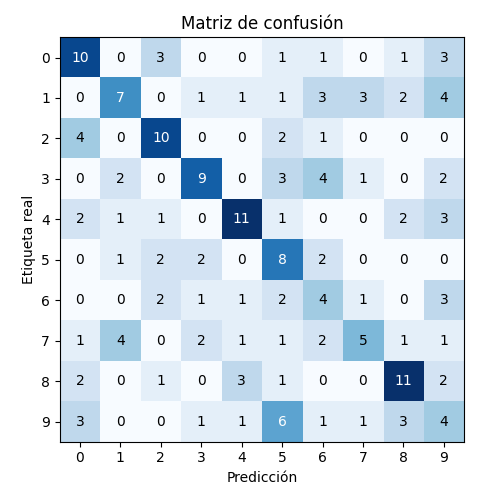

              precision    recall  f1-score   support

           0      0.455     0.526     0.488        19
           1      0.467     0.318     0.378        22
           2      0.526     0.588     0.556        17
           3      0.562     0.429     0.486        21
           4      0.611     0.524     0.564        21
           5      0.308     0.533     0.390        15
           6      0.222     0.286     0.250        14
           7      0.455     0.278     0.345        18
           8      0.550     0.550     0.550        20
           9      0.182     0.200     0.190        20

    accuracy                          0.422       187
   macro avg      0.434     0.423     0.420       187
weighted avg      0.444     0.422     0.425       187



In [109]:
test_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_dataset = datasets.ImageFolder('wikiart/images/test', transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=512)

targets, predictions = [], []
for mbdata, label in test_loader:
    logits = model.forward(mbdata)
    predictions.append(logits.argmax(dim=1).detach().numpy())
    targets.append(label.numpy())
predictions = np.concatenate(predictions)
targets = np.concatenate(targets)

from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')

cm = confusion_matrix(y_true=targets, y_pred=predictions)
plot_confusion_matrix(cm, labels=[str(i) for i in range(10)])

print(classification_report(targets, predictions, digits=3))

<IPython.core.display.Javascript object>


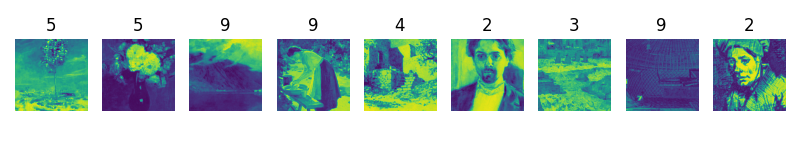

In [110]:
category = 6
idx = np.where((targets == category) & ~(predictions == category))[0]

fig, ax = plt.subplots(1, 9, figsize=(8, 1.5), tight_layout=True)
for i in range(9):
    ax[i].imshow(test_dataset[idx[i]][0].numpy()[0, :, :])
    ax[i].set_title(predictions[idx[i]])
    ax[i].axis('off')

A continuación vizualizaremos las predicciones para la primera imagen de las presentedas arriba

<IPython.core.display.Javascript object>


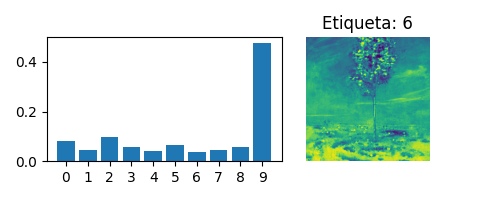

In [118]:
image, label = test_dataset[116]
# Usamos unsqueeze para convertirlo en un minibatch de 1 elemento:
y = torch.nn.Softmax(dim=1)(model.forward(image.unsqueeze(0)))

fig, ax = plt.subplots(1, 2, figsize=(5, 2), tight_layout=True)
ax[0].bar(range(10), height=y.detach().numpy()[0])
ax[0].set_xticks(range(10))
ax[1].set_title("Etiqueta: %d" %(label))
ax[1].imshow(image.numpy()[0, :, :]);
ax[1].axis('off');

Esta imagen pertenece a la categoría 6: Realism y la confundió completamente con la categoría 9: Symbolism, lo cual es entendible, puesto que es una pintura de un árbol.

<IPython.core.display.Javascript object>


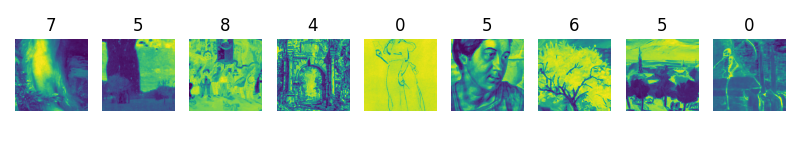

In [111]:
category = 9
idx = np.where((targets == category) & ~(predictions == category))[0]

fig, ax = plt.subplots(1, 9, figsize=(8, 1.5), tight_layout=True)
for i in range(9):
    ax[i].imshow(test_dataset[idx[i]][0].numpy()[0, :, :])
    ax[i].set_title(predictions[idx[i]])
    ax[i].axis('off')

<IPython.core.display.Javascript object>


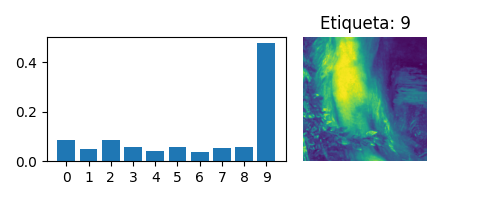

In [126]:
image, label = test_dataset[167]
# Usamos unsqueeze para convertirlo en un minibatch de 1 elemento:
y = torch.nn.Softmax(dim=1)(model.forward(image.unsqueeze(0)))

fig, ax = plt.subplots(1, 2, figsize=(5, 2), tight_layout=True)
ax[0].bar(range(10), height=y.detach().numpy()[0])
ax[0].set_xticks(range(10))
ax[1].set_title("Etiqueta: %d" %(label))
ax[1].imshow(image.numpy()[0, :, :]);
ax[1].axis('off');

Para esta imagen el modelo tenía mayor seguridad para la etiqueta 9:Symbolism, sin embargo, la etiquetó para la categoría 7:Romanticismo, esto puede significar que hay algo mal con los pesos al tomar la decisión.

### Conclusiones

Notamos que todos los modelos tuvieron una baja tasa de precisión, esto se podría mejorar aumentando los datos, o cambiando de mejor forma las capas del modelo preentrenado.